   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

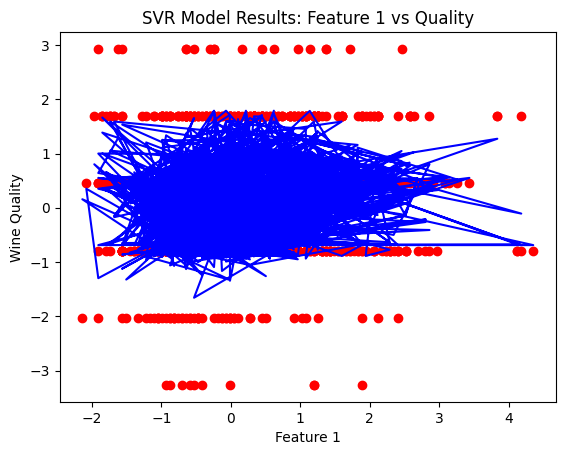

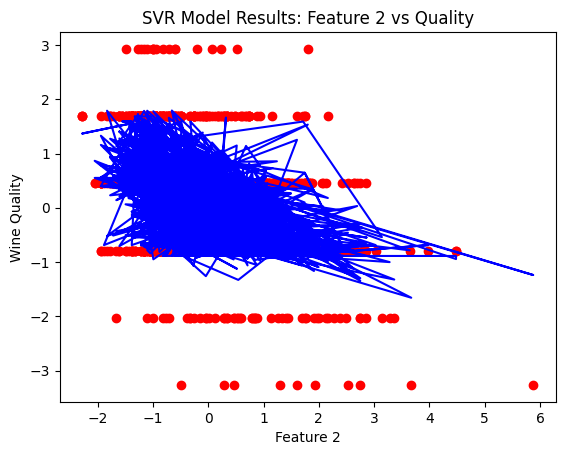

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

# Load the dataset (ensure the dataset is in the correct directory or provide the full path)
dataset = pd.read_csv("/content/winequality-red.csv")  # Replace with the correct path

# Preview the first few rows of the dataset to understand its structure
print(dataset.head())

# --- Data Preprocessing ---
# Check for missing values
print(dataset.isnull().sum())

# Select features and target variable
X = dataset.drop("quality", axis=1).values  # Features (independent variables)
y = dataset["quality"].values  # Target variable (dependent variable)

# --- Feature Scaling ---
# Standardize the features and the target variable
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1)).ravel()  # Flatten y after scaling

# --- Train SVR Model ---
# Train the Support Vector Regression model using the RBF kernel
regressor = SVR(kernel='rbf')
regressor.fit(X, y)  # Fit the model

# Predict a new result (inverse transform the prediction to get original scale)
# Example: Predicting for a wine sample with specific features
# The sample data should have the same number of features as the training data (11 features)
sample = [[7.4, 0.7, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 0]]  # Example input with 11 features (added a 0 for the missing feature)

y_pred_scaled = regressor.predict(sc_X.transform(sample)).reshape(-1, 1)
y_pred = sc_y.inverse_transform(y_pred_scaled)

print(f"Predicted Quality for a wine sample with specific features: {y_pred[0][0]}")

# --- Model Accuracy (R^2 Score) ---
accuracy = regressor.score(X, y)  # R^2 score
print(f"Accuracy (R^2 Score) of the model is: {accuracy * 100}%")

# --- Visualize the Results ---
# Visualize the SVR model results for the first feature vs the target quality
plt.scatter(X[:, 0], y, color="red")  # Feature vs Target
plt.plot(X[:, 0], regressor.predict(X), color="blue")  # SVR predicted line
plt.title("SVR Model Results: Feature 1 vs Quality")
plt.xlabel("Feature 1")
plt.ylabel("Wine Quality")
plt.show()

# Visualize the SVR model results for the second feature vs the target quality
plt.scatter(X[:, 1], y, color="red")  # Feature vs Target
plt.plot(X[:, 1], regressor.predict(X), color="blue")  # SVR predicted line
plt.title("SVR Model Results: Feature 2 vs Quality")
plt.xlabel("Feature 2")
plt.ylabel("Wine Quality")
plt.show()